PCA to reduce dimension and generate new images
Use Fashion-MNIST to build a PCA model. <br>
https://github.com/zalandoresearch/fashion-mnist <br>

#### * visualize data in 2D (reduced dimension) <br>
#### * generate new images with PCA as generative model <br>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import offsetbox
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.manifold import TSNE

#### Data

In [270]:
fasion_mnist=fetch_openml(name="Fashion-MNIST")

In [271]:
data=fasion_mnist.data.values
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')

In [272]:
data.shape

(70000, 784)

In [273]:
images.shape

(70000, 28, 28)

In [274]:
target.shape

(70000,)

In [275]:
[target.min(), target.max()]

[0, 9]

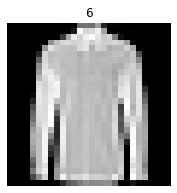

<Figure size 432x288 with 0 Axes>

In [276]:
#Some of the MNIST - fashion images
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')    
    ax.axis('off')
    ax.set_title(target[n])
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)  

In [277]:
def plot_components(data, model, images, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

In [283]:
pca = IncrementalPCA(n_components=2, whiten=False) 
X = data
Beta = pca.fit_transform(X)
Y = Beta / np.sqrt(pca.explained_variance_)
print(X.shape)
print(Y.shape)
print(X)

(70000, 784)
(70000, 2)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Data visualisation in 2D after incremental PCA (runs faster than PCA)

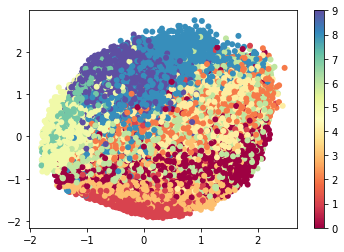

In [284]:

fig, ax = plt.subplots()
plt.scatter(Y[:, 0], Y[:, 1], c=target, edgecolor='none', cmap='Spectral')
plt.colorbar()

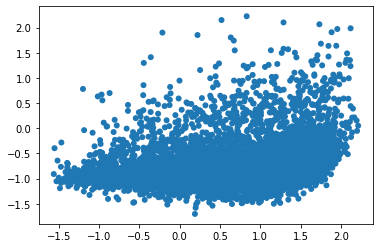

In [285]:
df=pd.DataFrame(Y)
df=df.join(target)
df.sort_values('class')

d = {}
for i in range(0,9):
    d[i] = pd.DataFrame()
    d[i] = df[df['class'] ==i]
df_0=d[0]
df_0
Y_0=df_0[[0,1]].to_numpy
Y_0
fig, ax = plt.subplots()
plt.scatter(df_0[0], df_0[1], edgecolor='none', cmap='Spectral')

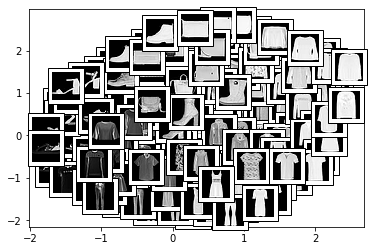

In [282]:
pca2 = IncrementalPCA(n_components=2, whiten=True)
plot_components(data, pca2, images, ax=None,
                    thumb_frac=0.05, cmap='gray')

### Visualisation of components with class label 0

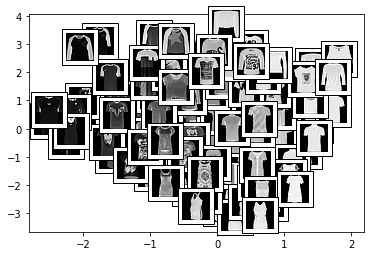

In [54]:
plot_components(data[target==0], pca2, images[target==0], ax=None,
                    thumb_frac=0.05, cmap='gray')

### Visualisation of components with class label 1

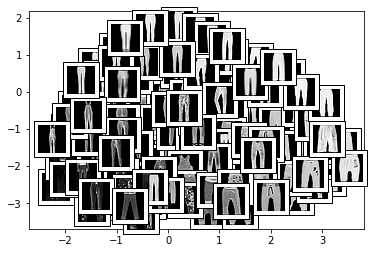

In [55]:
plot_components(data[target==1], pca2, images[target==1], ax=None,
                    thumb_frac=0.05, cmap='gray')

### PCA to generate new images

### Find optimal number of PCA components

In [297]:
pca = IncrementalPCA(batch_size=None, copy=True, n_components=100, whiten=False)
pca

IncrementalPCA(n_components=100)

## Explained variance visualisation (factors vs explained var)

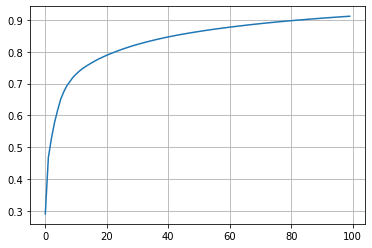

In [298]:
Beta = pca.fit_transform(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
lambda_=pca_task2.explained_variance_ratio_


## three methods to find number of factors necessary to desired allowable error

In [302]:
#1) reconstruction error is sum of Eig values from K+1 to M
recon_error=1-np.cumsum(lambda_[0:24])[-1]
print(recon_error)
print('reconstruction error <= 20% provided n components >= 24')

#2) percentage of variance explained
pca_ = PCA(n_components=0.80).fit(X)
print('Percentage of variance explained is >= when n components >=',pca_.n_components_)

#3) cumulative explained variance ratio
import numpy as np
from numpy import trapz

y =np.cumsum(pca.explained_variance_ratio_[0:24])

# Compute the area using the composite trapezoidal rule.
area = trapz(y, dx=5)
print("area =", area,'Thus when the n components >= 24 cumulative explained variance ratio >= 80%')


0.19904101777320093
reconstruction error <= 20% provided n components >= 24
Percentage of variance explained is >= when n components >= 24
area = 80.82142356620233 Thus when the n components >= 24 cumulative explained variance ratio >= 80%


In [320]:
# mean, eigenvalues, and eigenvectors of our specific PCA model
mu=pca.mean_
v=pca.explained_variance_
w=pca_task2.components_ * np.sqrt(pca_task2.explained_variance_.reshape(100,1))

In [321]:
v.shape

(100,)

In [322]:
w.shape

(100, 784)

## Plot of mean image from PCA (reshape data)

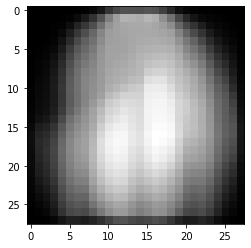

In [323]:
plt.imshow(mu.reshape(28,28), cmap='gray')

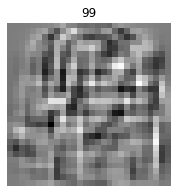

<Figure size 432x288 with 0 Axes>

In [324]:
#Each image is an eigenvector
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, 100):
    ax.imshow(w[n].reshape(28,28), cmap='gray')    
    ax.axis('off')
    ax.set_title(n)
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2) 


In [202]:
# L2 norm of an eigenvector w[0]
np.sum(w[0]**2)

(100, 784)

In [213]:
3*np.random.randn()
y= 3*np.random.randn(100,1)
len(y)

100

## Generate new images using linear combo of eigenvectors and randomly generated weights

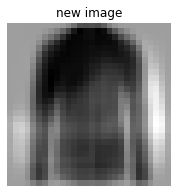

<Figure size 432x288 with 0 Axes>

In [326]:
# 100 new images generated with 24 PCA components
n_components=24

# generate some new face images
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, 100):
    y= 3*np.random.randn(100,1)
    x_new=mu
    for k in range(0,n_components):
        x_new= x_new+y[k]*np.sqrt(v[k])*w[k]
    I = x_new.reshape(28,28) 
    ax.imshow(I, cmap='gray')    
    ax.axis('off')
    ax.set_title('new image')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(.2) 


### t-SNE for visualization

In [225]:
data_s=data[0::100]
target_s=target[0::100]
images_s=images[0::100]

/Users/SophiaZorek/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/SophiaZorek/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


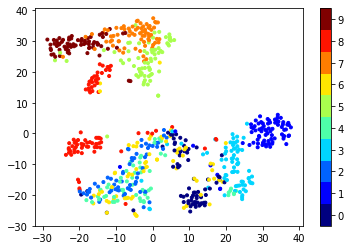

In [226]:
model = TSNE(n_components=2)
proj = model.fit_transform(data_s)
plt.scatter(proj[:, 0], proj[:, 1], c=target_s, cmap=plt.cm.get_cmap('jet', 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);